import libraries


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


datasets

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
X=data.drop('Exited',axis=1)
y=data['Exited']


calculating the imbalance in target column

In [15]:
class_counts = data['Exited'].value_counts()
total = len(data)
class_distribution = class_counts / total * 100

In [17]:
print("Class Counts:")
print(class_counts)
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Class Distribution (%):
Exited
0    79.63
1    20.37
Name: count, dtype: float64


plotting the imbalance

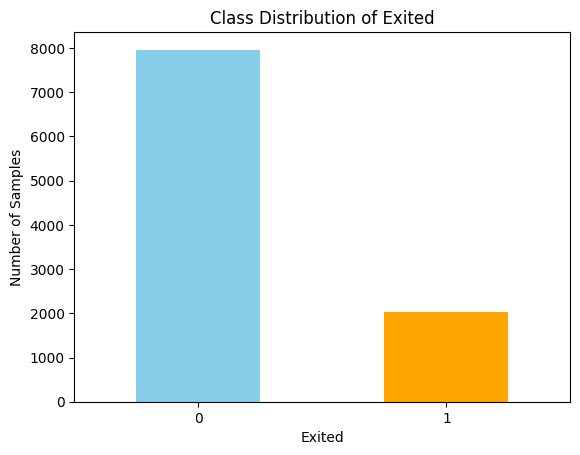

In [16]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

Splitting the train and test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

processing the numerical and categorical data

In [9]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary']
cat_cols=['Geography','Gender']

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
         ('cat',OneHotEncoder(),cat_cols)
    ]
)

In [21]:
pipelines = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced'))
    ]),
    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ])
}

Training the model and visualizing using confusion matrix


Logistic Regression
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.97      0.88      2003
           1       0.46      0.12      0.19       497

    accuracy                           0.80      2500
   macro avg       0.64      0.54      0.53      2500
weighted avg       0.74      0.80      0.75      2500



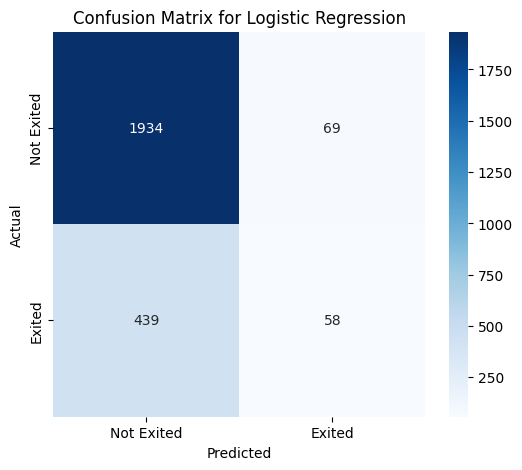


Random Forest
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2003
           1       0.56      0.29      0.38       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



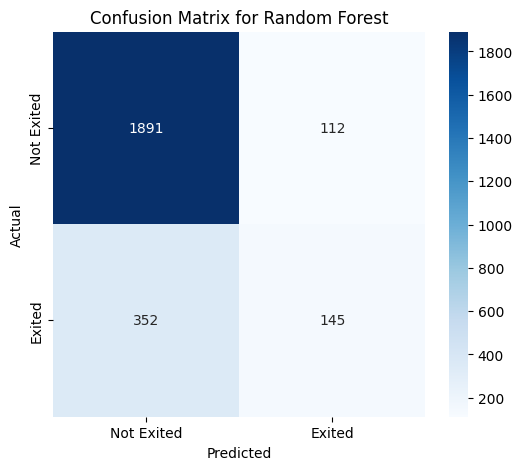


Gradient Boosting
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2003
           1       0.65      0.30      0.41       497

    accuracy                           0.83      2500
   macro avg       0.75      0.63      0.65      2500
weighted avg       0.81      0.83      0.80      2500



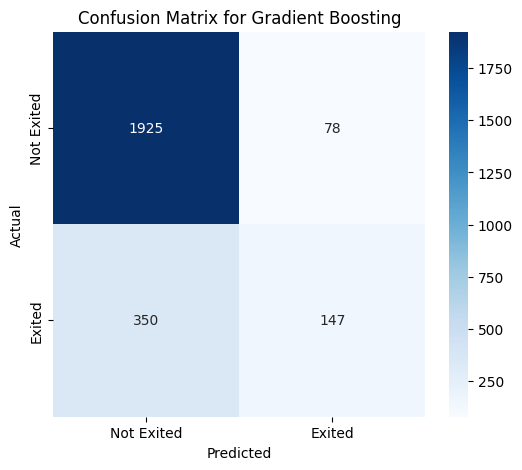

In [26]:
for name, pipeline in pipelines.items():
    print(f"\n{name}")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Gradient boosting has more accuracy